# Mini Project 2

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**


###  Hypothesis Testing of Standard Assumptions Theoretical Financial Mathematics

In the theory of mathematical finance, it is common to assume the log returns of a stock/index are normally distributed.


Investigate if the log returns of stocks or indexes of your choosing are normally distributed. Some suggestions for exploration include:

    1) Test if there are period of times when the log-returns of a stock/index have evidence of normal distribution.
    
    2) Test if removing extremal return data creates a distribution with evidence of being normal.
    
    3) Create a personalized portfolio of stocks with historical log return data that is normally distributed.
    
    4) Test if the portfolio you created in the first mini-project has significant periods of time with evidence of normally distributed log returns.
    
    5) Gather x-number of historical stock data and just perform a normality test on their log return data to see if any of the stocks exhibit evidence of log returns that are normally distributed.

In [2]:
# Package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_style('darkgrid')

import yfinance as yf
import datetime as dt

The following tests normality for Bank of America. We hypothesized that the stock for a banking company should be more normal, since they work with large capital.

In [21]:
#Two years of data
start_date = dt.datetime.today() - dt.timedelta(days = 2*365)
end_date = dt.datetime.today()


#logreturn data for BAC
BAC_stock = yf.download('BAC', start = start_date, end = end_date)
BAC_returns = BAC_stock['Close']/BAC_stock['Close'].shift(1)
BAC_logreturns = np.log(BAC_returns.dropna())['BAC'].values


#p-value of normality test
p_bac=stats.normaltest(BAC_logreturns)[1]

#Print evidence/non-evidence of normality
print(f"BAC log return distribution: p-value = {p_bac:.4f}")
if p_bac < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

/var/folders/b2/sgtqc2y97s5_wfhhb8wbrwgr0000gn/T/ipykernel_5085/4294136081.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BAC_stock = yf.download('BAC', start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed

BAC log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


It turns out that the data of log returns over the past two years is not normally distributed. We decided to test this over the first half of the data.

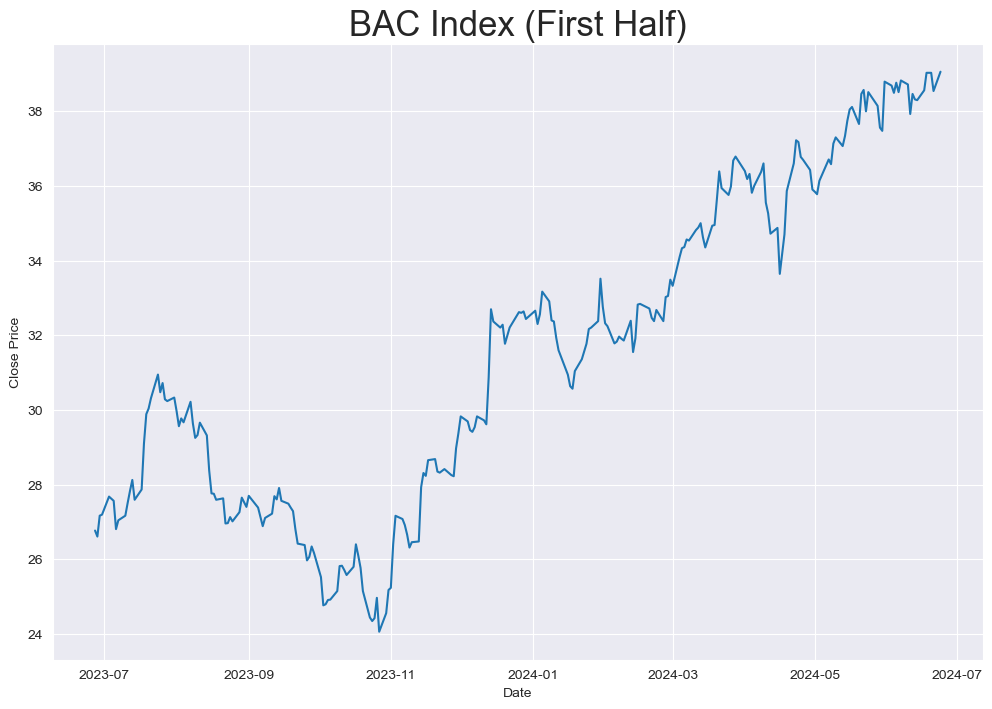

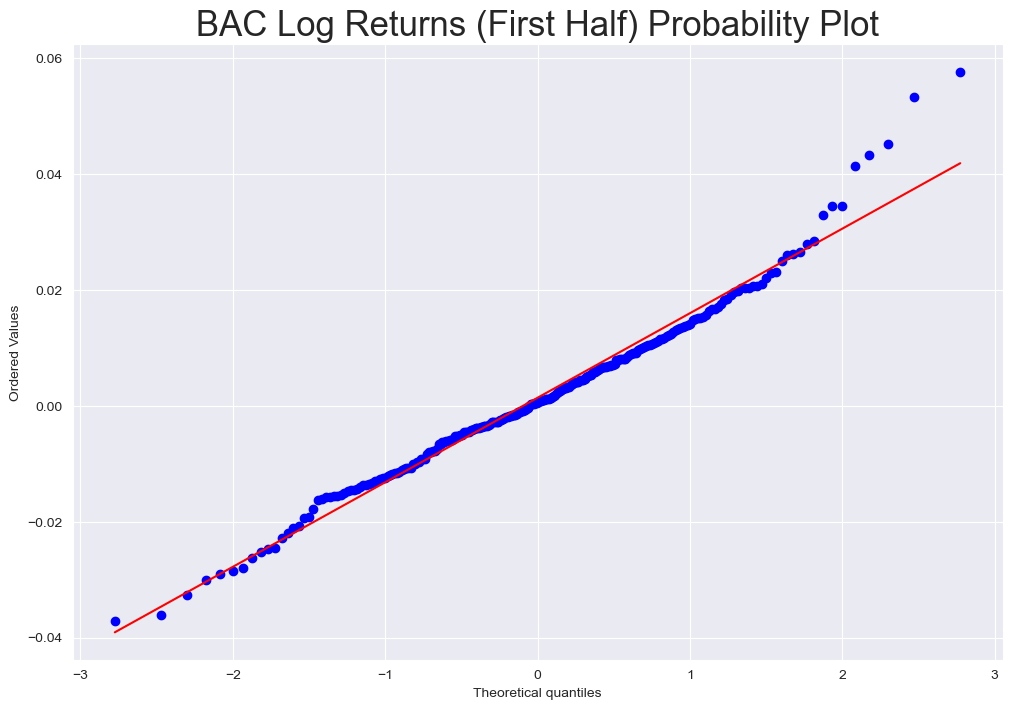

BAC log return (First Half) distribution: p-value = 0.0001
→ Statistically significant evidence that the data is NOT normally distributed.


In [26]:
half_index = int(np.floor(len(BAC_logreturns)/2))

BAC_logreturns_historical = BAC_logreturns[0:half_index]


BAC_historical = BAC_stock['Close'].iloc[:half_index]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(BAC_historical)
plt.title('BAC Index (First Half)', fontsize=25)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,8))
stats.probplot(BAC_logreturns_historical, plot = plt)
plt.title('BAC Log Returns (First Half) Probability Plot', size = '25')
plt.show()



p_bac_historical = stats.normaltest(BAC_logreturns_historical)[1]

print(f"BAC log return (First Half) distribution: p-value = {p_bac_historical:.4f}")
if p_bac_historical < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

So, it turns out that the recent turbulent periods in the stock market was not the cause of the non-normality of the data.
It turns out that our hypothesis that a banking firm should have a more normally distributed log return profile is false.

We then suspected that perhaps an index fund should be under the effect of the law of large numbers. We tested this out for IYF, which is an index fund for the financial sector.

In [23]:
#Two years of data
start_date = dt.datetime.today() - dt.timedelta(days = 2*365)
end_date = dt.datetime.today()


#logreturn data for BAC
IYF_stock = yf.download('IYF', start = start_date, end = end_date)
IYF_returns = IYF_stock['Close']/IYF_stock['Close'].shift(1)
IYF_logreturns = np.log(IYF_returns.dropna())['IYF'].values


#p-value of normality test
p_iyf=stats.normaltest(IYF_logreturns)[1]

#Print evidence/non-evidence of normality
print(f"IYF log return distribution: p-value = {p_iyf:.4f}")
if p_iyf < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

/var/folders/b2/sgtqc2y97s5_wfhhb8wbrwgr0000gn/T/ipykernel_5085/4224056950.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  IYF_stock = yf.download('IYF', start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed

IYF log return distribution: p-value = 0.0000
→ Statistically significant evidence that the data is NOT normally distributed.


Again, the past two years data of log returns is not normally distributed. We decided to test this over the first half of the data.

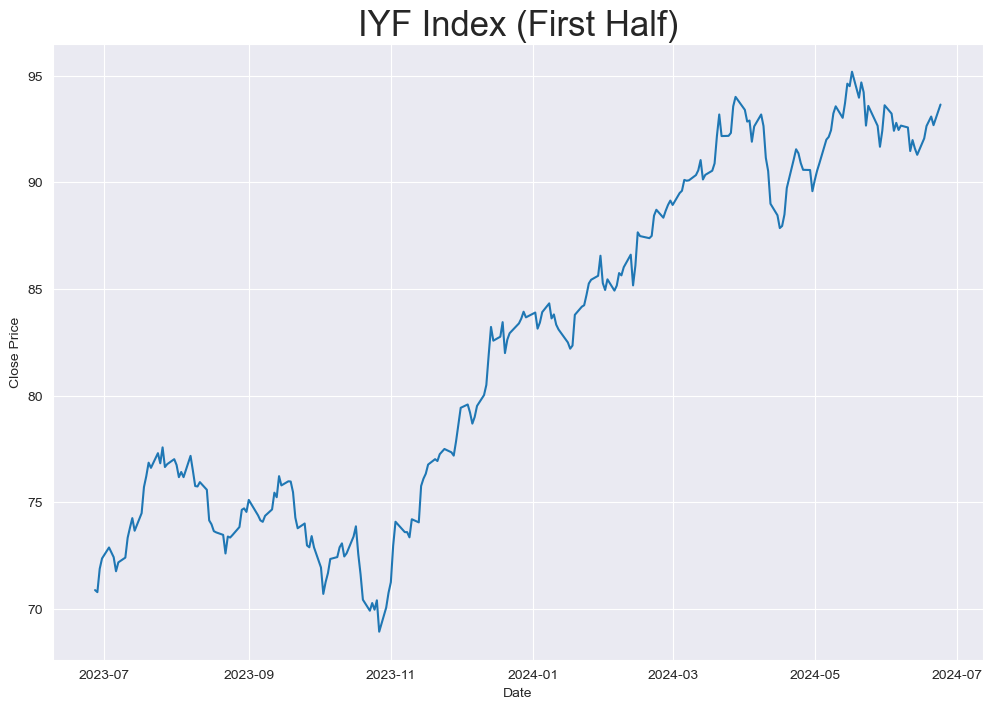

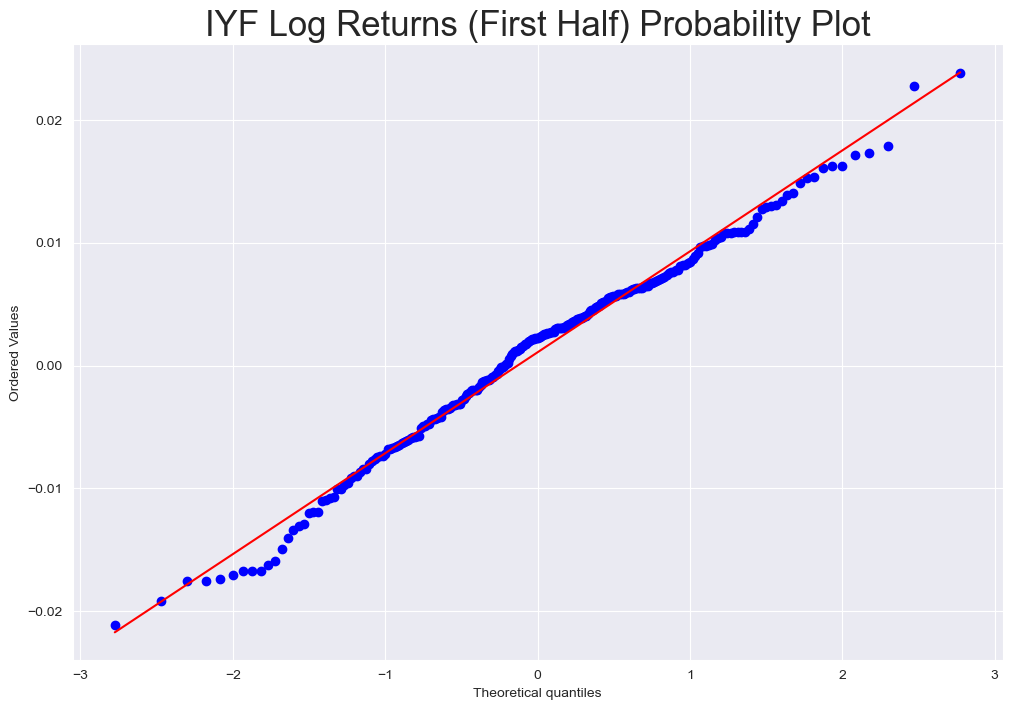

IYF log return (First Half) distribution: p-value = 0.2803
→ No statistically significant evidence against normality.


In [25]:
half_index = int(np.floor(len(IYF_logreturns)/2))

IYF_logreturns_historical = IYF_logreturns[0:half_index]


IYF_historical = IYF_stock['Close'].iloc[:half_index]

# Plot
plt.figure(figsize=(12, 8))
plt.plot(IYF_historical)
plt.title('IYF Index (First Half)', fontsize=25)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,8))
stats.probplot(IYF_logreturns_historical, plot = plt)
plt.title('IYF Log Returns (First Half) Probability Plot', size = '25')
plt.show()



p_iyf_historical = stats.normaltest(IYF_logreturns_historical)[1]

print(f"IYF log return (First Half) distribution: p-value = {p_iyf_historical:.4f}")
if p_iyf_historical < 0.05:
    print("→ Statistically significant evidence that the data is NOT normally distributed.")
else:
    print("→ No statistically significant evidence against normality.")

It turns out that historically, the IYF index fund demonstrated normally distributed log returns.